In [5]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot') 
%pylab inline

df = pd.read_csv("questions.all.subj.csv")


Populating the interactive namespace from numpy and matplotlib


,﻿KÖN,ålder,Fraga1,Fraga2,fraga3,fraga4,fraga5,fraga6,Fraga7,Fraga8,...,Fraga27,VAR00004,ILSKA,FÖRAKT,AVSKY,RÄDSLA,GLÄDJE,SORG,FÖRVÅNING,Totalemotion
0,0,51,3,5,4,6,5,5,3,4,...,5,,100,100,90,100,80,80,70,88.571429
1,0,35,4,6,2,7,3,7,3,5,...,6,,100,90,80,50,30,90,90,75.714286
2,1,44,3,6,1,7,2,6,4,1,...,5,,100,80,100,80,30,80,90,80.000000
3,1,23,5,5,2,2,2,6,4,4,...,6,,90,90,90,90,50,90,60,80.000000
4,1,27,1,3,4,3,5,4,3,3,...,5,,90,80,60,100,30,60,100,74.285714
5,1,21,7,7,2,7,2,6,2,5,...,5,,100,100,40,70,90,30,50,68.571429
6,0,24,4,5,2,5,5,4,5,3,...,4,,100,50,70,40,0,20,100,54.285714
7,0,22,5,4,3,6,3,5,2,5,...,6,,100,40,50,20,40,30,80,51.428571
8,0,47,6,5,3,6,5,5,4,3,...,3,,70,30,30,50,30,20,50,40.000000
9,0,34,5,7,1,5,2,4,3,2,...,4,,60,100,70,10,0,50,90,54.285714


In [3]:
EMOTIONS = ["blank", "anger", "contempt", "disgust", "fear", "happiness", "sadness", "surprise", "overall"]
EMOTIONS_ALTERNATIVE = ["blank", "happiness", "anger", "contempt", "fear", "disgust", "sadness", "surprise", "overall"]

assert set(EMOTIONS) == set(EMOTIONS_ALTERNATIVE), set(EMOTIONS) - set(EMOTIONS_ALTERNATIVE)

df_first = df[:50]
df_first.columns = (["gender", "age"] + 
            ["q{}".format(x) for x in range(1, 28)] + 
              EMOTIONS_ALTERNATIVE)


df_last = df[50:]
df_last.columns = (["gender", "age"] + 
            ["q{}".format(x) for x in range(1, 28)] + 
              EMOTIONS)

df_new = df_first.append(df_last)

assert len(df_new) == len(df)

df_new.to_csv("questions_fixed.csv")


In [4]:
df_new[EMOTIONS].mean().round(2)

anger        62.96
contempt     59.75
disgust      61.98
fear         57.78
happiness    95.43
sadness      57.04
surprise     89.38
overall      69.19
dtype: float64

In [5]:
df_new["row"] = df.index
melted = pd.melt(df_new[EMOTIONS[1:] + ["row"]],id_vars="row", value_name='perc', var_name='emotion')

melted["all_correct"] = (melted.perc > 99.99)

pivoted = melted[["row", "emotion", "all_correct"]].pivot("row", columns='emotion', values="all_correct")

pivoted.sum()[EMOTIONS[1:]]

emotion
anger         9
contempt     12
disgust       9
fear          5
happiness    59
sadness       2
surprise     45
overall       0
dtype: int64

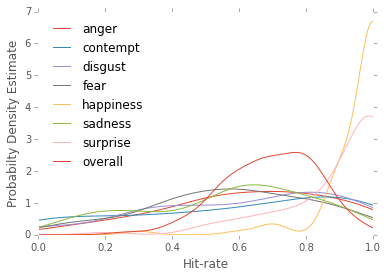

In [6]:
ax = (df_new[EMOTIONS[1:]]/100).plot(kind="kde", xlim=(0, 1))

ax.set_xlabel("Hit-rate")
ax.set_ylabel("Probabilty Density Estimate")

ax.get_figure().savefig('kde.eps', format='eps', dpi=1200)
ax.get_figure().savefig('kde.pdf', format='pdf', dpi=1200)
ax.get_figure().savefig('kde.svg', format='svg', dpi=1200)



,﻿KÖN,ålder,Fraga1,Fraga2,fraga3,fraga4,fraga5,fraga6,Fraga7,Fraga8,...,Fraga27,VAR00004,ILSKA,FÖRAKT,AVSKY,RÄDSLA,GLÄDJE,SORG,FÖRVÅNING,Totalemotion
0,0,51,3,5,4,6,5,5,3,4,...,5,,100,100,90,100,80,80,70,88.571429
1,0,35,4,6,2,7,3,7,3,5,...,6,,100,90,80,50,30,90,90,75.714286
2,1,44,3,6,1,7,2,6,4,1,...,5,,100,80,100,80,30,80,90,80.000000
3,1,23,5,5,2,2,2,6,4,4,...,6,,90,90,90,90,50,90,60,80.000000
4,1,27,1,3,4,3,5,4,3,3,...,5,,90,80,60,100,30,60,100,74.285714
5,1,21,7,7,2,7,2,6,2,5,...,5,,100,100,40,70,90,30,50,68.571429
6,0,24,4,5,2,5,5,4,5,3,...,4,,100,50,70,40,0,20,100,54.285714
7,0,22,5,4,3,6,3,5,2,5,...,6,,100,40,50,20,40,30,80,51.428571
8,0,47,6,5,3,6,5,5,4,3,...,3,,70,30,30,50,30,20,50,40.000000
9,0,34,5,7,1,5,2,4,3,2,...,4,,60,100,70,10,0,50,90,54.285714
